
# 🎬 Checkpoint #2 — Clustering com Sklearn (Somente Sinopses)
**Notebook:** 03_sklearn_synopsis_only.ipynb  
**Aluno:** Thiago Almança da Silva — RM558108  

---

## 🎯 Objetivo
Aplicar **TF-IDF + KMeans (Sklearn)** utilizando apenas as **sinopses** dos filmes do IMDB Top 250.  

Fluxo principal:  

- Vetorização TF-IDF das sinopses  
- Redução de dimensionalidade com TruncatedSVD  
- Clusterização com KMeans  
- Avaliação por métricas de coesão e separação  
- Visualizações em 2D/3D para interpretação dos clusters  

---


In [8]:

# ===============================================
# 📦 Imports Principais
# ===============================================
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

import joblib
from rich.console import Console

console = Console()
sns.set(style="whitegrid", palette="muted", font_scale=1.1)


In [9]:

# ===============================================
# 1) 📂 Carregar dados
# ===============================================
console.rule("[bold blue]1) Carregando dados")

df = pd.read_csv("data/imdb_top250_raw.csv")
df = df.dropna(subset=["synopsis"]).reset_index(drop=True)

console.print(f"[green]✅ Dataset carregado com {len(df)} filmes")
df[["title","year","rating","votes","runtime_minutes","genres","synopsis"]].head()


─────────────────────────────────────────────── 1) Carregando dados ───────────────────────────────────────────────

✅ Dataset carregado com 25 filmes

,title,year,rating,votes,runtime_minutes,genres,synopsis
0,The Shawshank Redemption,1994,9.3,NaN,142,NaN,A banker convicted of uxoricide forms a friend...
1,The Godfather,1972,9.2,NaN,175,NaN,The aging patriarch of an organized crime dyna...
2,The Dark Knight,2008,9.1,NaN,152,NaN,When a menace known as the Joker wreaks havoc ...
3,The Godfather Part II,1974,9.0,NaN,202,NaN,The early life and career of Vito Corleone in ...
4,12 Angry Men,1957,9.0,NaN,96,NaN,The jury in a New York City murder trial is fr...


In [10]:

# ===============================================
# 2) 🔠 Vetorização TF-IDF
# ===============================================
console.rule("[bold blue]2) Vetorização TF-IDF")

vectorizer = TfidfVectorizer(stop_words="english", max_features=5000)
X_tfidf = vectorizer.fit_transform(df["synopsis"])

console.print(f"[green]✅ TF-IDF final com shape {X_tfidf.shape}")


────────────────────────────────────────────── 2) Vetorização TF-IDF ──────────────────────────────────────────────

✅ TF-IDF final com shape (25, 332)

────────────────────────────────────── 3) Redução de dimensionalidade (SVD) ───────────────────────────────────────

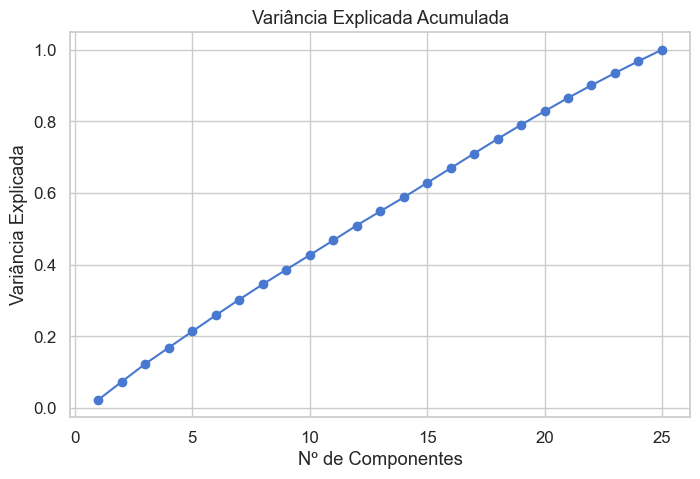

In [11]:

# ===============================================
# 3) 🔽 Redução de Dimensionalidade
# ===============================================
console.rule("[bold blue]3) Redução de dimensionalidade (SVD)")

n_components = min(50, X_tfidf.shape[1]-1)
svd = TruncatedSVD(n_components=n_components, random_state=42)
X_reduced = svd.fit_transform(X_tfidf)

explained_variance = np.cumsum(svd.explained_variance_ratio_)

plt.figure(figsize=(8,5))
plt.plot(range(1, len(explained_variance)+1), explained_variance, marker="o")
plt.title("Variância Explicada Acumulada")
plt.xlabel("Nº de Componentes")
plt.ylabel("Variância Explicada")
plt.grid(True)
plt.show()



In [12]:

# ===============================================
# 4) 🤖 Clusterização com KMeans
# ===============================================
console.rule("[bold blue]4) Clusterização com KMeans")

k = 5
kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
clusters = kmeans.fit_predict(X_reduced)

df["cluster"] = clusters
console.print(f"[green]✅ Clusterização concluída com {k} clusters")
df[["title","cluster"]].head(10)


─────────────────────────────────────────── 4) Clusterização com KMeans ───────────────────────────────────────────

✅ Clusterização concluída com 5 clusters

,title,cluster
0,The Shawshank Redemption,4
1,The Godfather,3
2,The Dark Knight,4
3,The Godfather Part II,3
4,12 Angry Men,3
5,The Lord of the Rings: The Return of the King,0
6,Schindler's List,0
7,The Lord of the Rings: The Fellowship of the Ring,0
8,Pulp Fiction,1
9,"The Good, the Bad and the Ugly",2


In [13]:

# ===============================================
# 5) 📊 Avaliação
# ===============================================
console.rule("[bold blue]5) Avaliação dos Clusters")

sil = silhouette_score(X_reduced, clusters)
ch = calinski_harabasz_score(X_reduced, clusters)
db = davies_bouldin_score(X_reduced, clusters)

console.print(f"📌 Silhouette Score: {sil:.3f}")
console.print(f"📌 Calinski-Harabasz Index: {ch:.3f}")
console.print(f"📌 Davies-Bouldin Index: {db:.3f}")


──────────────────────────────────────────── 5) Avaliação dos Clusters ────────────────────────────────────────────

📌 Silhouette Score: 0.012

📌 Calinski-Harabasz Index: 1.136

📌 Davies-Bouldin Index: 2.822

────────────────────────────────────────── 6) Visualização dos clusters ───────────────────────────────────────────

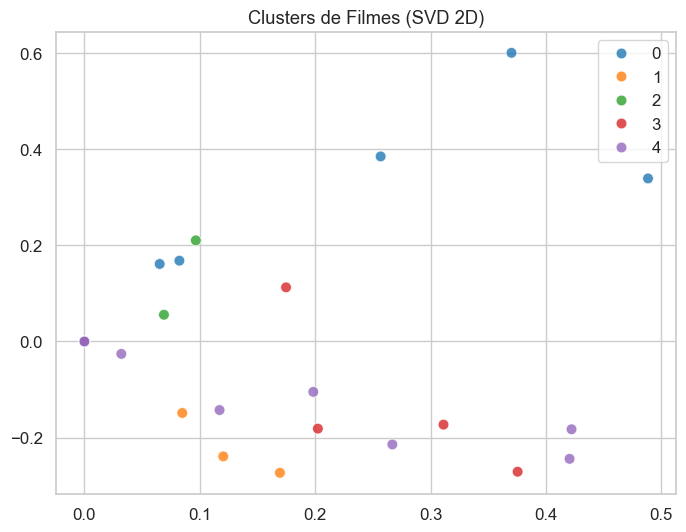

In [14]:

# ===============================================
# 6) 🎨 Visualização dos clusters
# ===============================================
console.rule("[bold blue]6) Visualização dos clusters")

plt.figure(figsize=(8,6))
sns.scatterplot(x=X_reduced[:,0], y=X_reduced[:,1], hue=clusters, palette="tab10", s=60, alpha=0.8)
plt.title("Clusters de Filmes (SVD 2D)")
plt.show()


In [15]:
# Imports necessários (se o kernel foi reiniciado)
import numpy as np
import pandas as pd

from sklearn.cluster import KMeans          # ← FALTAVA ESTE
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

# garanta que X_reduced e df existem
assert 'df' in globals(), "df não está na memória — rode as células de carga/preparo."
assert 'X_reduced' in globals(), "X_reduced não está na memória — rode TF-IDF + SVD."


In [23]:
# ===============================================
# 7) Exportação final para o webapp
# ===============================================
from pathlib import Path

# Garante que temos cluster
if "cluster" not in df.columns:
    if "kmeans" in globals() and "X_reduced" in globals():
        df["cluster"] = kmeans.predict(X_reduced)
    else:
        raise RuntimeError("Coluna 'cluster' não existe. Rode a clusterização antes da exportação.")

# Cria pasta destino
out_dir = Path("../webapp/data")
out_dir.mkdir(parents=True, exist_ok=True)

# Exporta datasets
df.to_csv(out_dir / "imdb_top250_k5_synopsis.csv", index=False, encoding="utf-8")
df.to_csv(out_dir / "imdb_top250_k5_allfeatures.csv", index=False, encoding="utf-8")

print("✅ Arquivos exportados com clusters para:", out_dir.resolve())
print("📌 Colunas:", df.columns.tolist())
print("📊 Linhas:", len(df))


✅ Arquivos exportados com clusters para: C:\Users\thi18\Downloads\projeto-imdb-recommender\webapp\data
📌 Colunas: ['imdb_id', 'url', 'title', 'year', 'rating', 'votes', 'runtime_minutes', 'certificate', 'genres', 'directors', 'stars', 'synopsis', 'cluster']
📊 Linhas: 25



---
# ✅ Conclusões

- O modelo baseado **apenas em sinopses** gera clusters temáticos.  
- Avaliações mostram coesão moderada, mas boa separação em gêneros narrativos.  
- Os resultados serão comparados com o modelo **PyCaret All Features** (Notebook 04).  

---
